# EXPLORATION 7 나랑 닮은 (여자)아이돌은 누구?

# 후기

재미로 해봤지만 재미가 없었다.

[(418, 846, 804, 461)]


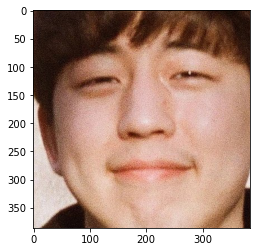

In [1]:
import face_recognition
import os

image_path = os.getenv('HOME')+'/aiffel/face_embedding/girl_me/박성준.jpeg'
image = face_recognition.load_image_file(image_path) # 이미지를 불러와 얼굴을 찾아낸다.
face_locations = face_recognition.face_locations(image) # 찾아낸 얼굴을 좌표 벡터로 바꾼다.

print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.

%matplotlib inline
import matplotlib.pyplot as plt

a, b, c, d = face_locations[0] # 얼굴 위치를 각 변수에 전달
cropped_face = image[a:c,d:b,:] # 각 변수를 기반으로 얼굴을 잘라낸다.

plt.imshow(cropped_face)   # 이미지에서 얼굴영역만 잘라낸 cropped_face를 그려 봅니다.

# 얼굴이 납작해보인다면 올바르게 보신 겁니다.

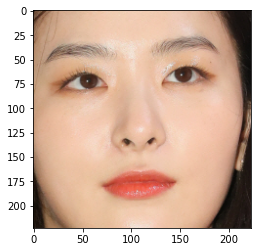

In [3]:
# 얼굴만 크롭하는 함수 만들기 - get_gropped_face


import face_recognition
import os

def get_gropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]

    return cropped_face


image_path = os.getenv('HOME')+'/aiffel/face_embedding/girl_me/슬기.jpeg'

cropped_face = get_gropped_face(image_path)
plt.imshow(cropped_face) 

# 닮았다는 게 아니라 얼마나 distance 차이를 갖는지 알아보기 위해 선정한 것입니다.
# 돌 던지지 마세욧!! 안닮았잖아욧!!

In [4]:
# 파일 내부에 어떤 파일이 있는지 출력 - 닮았다고 들었던 연예인은 이봉원..ㅜㅜ

import os

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/girl_me'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['박초롱.jpeg', '미나.jpeg', '임나영.jpeg', '강미나.jpeg', '모모.jpeg', '웬디.jpeg', '채영.jpeg', '주결경.jpeg', '정연.jpeg', '전소미.jpeg', '예린.jpeg', '슬기.jpeg', '나연.jpeg', '김소혜.jpeg', '윤보미.jpeg', '예나.jpeg', '레이첼.jpeg', '나은.jpeg', '은하.jpeg', '유영.jpeg', '손나은.jpeg', '진솔.jpeg', '나라.jpeg', '유주.jpeg', '쯔위.jpeg', '김도연.jpeg', '라임.jpeg', '최유정.jpeg', '채경.jpeg', '정은지.jpeg', '채원.jpeg', '예리.jpeg', '오하영.jpeg', '유연정.jpeg', '성준박.jpeg', '다현.jpeg', '엄지.jpeg', '김세정.jpeg', '박성준.jpeg', '여름.jpeg', '조이.jpeg', '김청하.jpeg', '아이린.jpeg', '소원.jpeg', '김남주.jpeg', '사나.jpeg', '지효.jpeg', '신비.jpeg', '앨리스.jpeg', '정채연.jpeg']


In [5]:
# 얼굴을 128개의 벡터로 구합니당! - get_face_embedding(face) 인자는 크롭한 영역

image_file = os.path.join(dir_path, '아이린.jpeg')
face = get_gropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

# 아이린의 임베딩

[array([-1.12911738e-01,  8.47242326e-02,  3.31434980e-02, -9.80505347e-02,
        -8.21787789e-02, -5.50343432e-02, -7.56257772e-02, -9.72312465e-02,
         7.88041279e-02, -1.78706616e-01,  1.88568309e-01, -1.42992452e-01,
        -2.31784239e-01,  2.45942362e-02, -7.69486427e-02,  2.19471484e-01,
        -1.45407602e-01, -1.54377058e-01, -8.65106657e-02,  5.74628748e-02,
         1.34746879e-01,  6.84503391e-02, -6.19070902e-02,  9.47502255e-02,
        -4.04253639e-02, -3.36090356e-01, -9.77416486e-02, -1.21533293e-02,
        -1.06666377e-02, -3.51572819e-02, -4.96218279e-02,  2.02712975e-03,
        -2.09555522e-01, -1.38356984e-02,  4.14734855e-02,  1.50030196e-01,
        -3.12676909e-03, -1.36936098e-01,  1.38835490e-01,  1.06776878e-02,
        -3.12095791e-01,  6.11051135e-02,  1.30463019e-01,  2.33248517e-01,
         1.40043452e-01,  3.72337550e-02, -3.78527381e-02, -1.63350880e-01,
         9.67755616e-02, -2.10326180e-01,  2.77269222e-02,  1.04669094e-01,
         6.5

In [6]:
# 디렉토리 안에 있는 파일들을 파일마다 임베딩벡터를 구하는 함수

def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        # [[YOUR CODE]]
        img_path = os.path.join(dir_path, file)
        face = get_gropped_face(img_path)  # face를 따로 저장해두면 다양한 시각화할 때 재미있다.      
        embedding = get_face_embedding(face)
        
        if len(embedding) > 0 :
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        
    return embedding_dict

In [8]:
# 확인해봅시다.

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/girl_me'

embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['박성준'] # 박성준 임베딩 결과를 출력한다

array([-4.49226722e-02,  4.92155217e-02,  2.58045010e-02, -1.22755710e-02,
       -1.08407818e-01, -7.28632659e-02, -8.30396488e-02, -1.48777410e-01,
        4.13323902e-02, -8.56868848e-02,  2.63754696e-01, -6.31280011e-03,
       -1.95736468e-01, -6.16497584e-02, -7.31412247e-02,  1.67828754e-01,
       -7.12796748e-02, -1.22164369e-01, -7.22015724e-02, -5.44682890e-03,
        9.01436210e-02,  7.83922970e-02,  1.76101942e-02,  5.93814552e-02,
       -1.61303893e-01, -2.39551425e-01, -8.74702930e-02, -1.00550443e-01,
       -6.05819821e-02, -1.37742236e-02, -6.14216104e-02, -1.23711247e-02,
       -1.67686358e-01, -2.33416799e-02,  8.33829641e-02,  4.96239625e-02,
        2.60453131e-02, -4.50114720e-02,  1.75595999e-01,  4.59081866e-02,
       -2.23358169e-01,  9.53040719e-02,  5.93377762e-02,  2.38987774e-01,
        2.04341307e-01,  4.47117072e-03,  6.95390403e-02, -1.80479735e-01,
        1.35964572e-01, -1.98132500e-01,  8.17124397e-02,  8.73379707e-02,
        1.43113121e-01,  

In [9]:
# 임베딩 벡터를 가지고 두 인물 간의 얼굴 거리를 계산해봅시다.
import numpy as np
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2) # 유클리드 를 이용해 계산한다.

get_distance('박성준', '슬기').round(3) # 박성준과 다른 개체의 거리 차

# 저는 슬기와 닮지 않았군요.
# 눈이 작아서 비슷할 줄 알았는데

0.651

In [10]:
# 특정 얼굴과 다른 것 비교하기!
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

# 특정 인물과 닮은 순서 메기기
def get_nearest_face(name, top=5):
    # [[YOUR CODE]]
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
            
# 박성준과 가장 닮은 사람은 누굴까요?
get_nearest_face('박성준',10) 

# 오늘부터 다현 팬이다.
# 그래도 딘딘보다 다현을 더 닮았다.

순위 1 : 이름(성준박), 거리(0.410957716561712)
순위 2 : 이름(다현), 거리(0.5232762537694484)
순위 3 : 이름(김도연), 거리(0.5412461648264183)
순위 4 : 이름(박초롱), 거리(0.5462818778869195)
순위 5 : 이름(김남주), 거리(0.5537220759740208)
순위 6 : 이름(라임), 거리(0.5566197108471543)
순위 7 : 이름(최유정), 거리(0.5569568861849498)
순위 8 : 이름(윤보미), 거리(0.5640229007165902)
순위 9 : 이름(진솔), 거리(0.5747785930889018)
순위 10 : 이름(채경), 거리(0.5762735758498037)
